<a href="https://colab.research.google.com/github/makkimaki/metric-learning/blob/main/wm_811k_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()   # upload the 'kaggle.json' file downloaded from Kaggle API platform.

In [8]:
!pip install -q kaggle
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

# List available datasets.
# !kaggle datasets list
!kaggle datasets list -s WM-811k

ref                      title                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------  ------------------  -----  -------------------  -------------  ---------  ---------------  
qingyi/wm811k-wafer-map  WM-811K wafer map   149MB  2018-02-26 05:44:18           5032         72  0.5              


In [9]:
# Copy the stackoverflow data set locally.
!kaggle datasets download -d qingyi/wm811k-wafer-map

 94% 140M/149M [00:01<00:00, 104MB/s]
100% 149M/149M [00:01<00:00, 94.9MB/s]


In [10]:
!ls

kaggle.json  sample_data  wm811k-wafer-map.zip


In [11]:
# !head ~/.kaggle/datasets/qingyi/wm811k-wafer-map/
!unzip ./wm811k-wafer-map.zip

Archive:  ./wm811k-wafer-map.zip
  inflating: LSWMD.pkl               


In [14]:
# loading libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline 

import os
import warnings
warnings.filterwarnings("ignore")

In [15]:
df = pd.read_pickle("./LSWMD.pkl")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [16]:
f_squeeze = lambda x: str(np.squeeze(x))

In [17]:
df["failureType"] = df["failureType"].map(f_squeeze)
df["trianTestLabel"] = df["trianTestLabel"].map(f_squeeze)
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,Training,none
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,Training,none
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,Training,none
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,Training,none
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,Training,none


In [18]:
# ラベル無しを除外する
df_tmp = df.query("failureType!='none' and failureType!='[]'")
print(len(df_tmp))
print(df_tmp["failureType"].unique())
df_tmp.head()

25519
['Loc' 'Edge-Loc' 'Center' 'Edge-Ring' 'Scratch' 'Random' 'Near-full'
 'Donut']


,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
19,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,20.0,Training,Loc
36,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,12.0,Training,Edge-Loc
37,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,13.0,Training,Edge-Loc
38,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,14.0,Training,Edge-Loc
39,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,15.0,Training,Edge-Loc


In [19]:
def find_dim(x):
    dim0 = np.size(x, axis=0)
    dim1 = np.size(x, axis=1)
    return dim0, dim1

In [20]:
import json


df_tmp["waferMapDim"] = df_tmp["waferMap"].apply(find_dim)
print(len(df_tmp))
# from sklearn.preprocessing import LabelEncoder
# lb = LabelEncoder()
# df_tmp['encoded_labels'] = lb.fit_transform(df_tmp['failureType'])

class2idx = {
    'Loc': 0,
    'Edge-Loc': 1,
    'Center': 2,
    'Edge-Ring': 3, 
    'Scratch': 4,
    'Random': 5, 
    'Near-full': 6,
    'Donut': 7
}
idx2class = {v: k for k, v in class2idx.items()}

class2idx_json_path = "./config_class2idx.json"
idx2class_json_path = "./config_idx2class.json"

with open(class2idx_json_path, "w") as f:
    json.dump(class2idx, f)

with open(idx2class_json_path, "w") as f:
    json.dump(idx2class, f)

df_tmp["encoded_labels"] = df_tmp["failureType"].replace(class2idx)
print(df_tmp["encoded_labels"].value_counts())
df_tmp.reset_index(inplace=True)
df_tmp.to_pickle("./LSWMD_25519.pkl")
df_tmp.head()

25519
3    9680
1    5189
2    4294
0    3593
4    1193
5     866
7     555
6     149
Name: encoded_labels, dtype: int64


,index,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,waferMapDim,encoded_labels
0,19,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,20.0,Training,Loc,"(45, 48)",0
1,36,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,12.0,Training,Edge-Loc,"(53, 58)",1
2,37,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,13.0,Training,Edge-Loc,"(53, 58)",1
3,38,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,14.0,Training,Edge-Loc,"(53, 58)",1
4,39,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,15.0,Training,Edge-Loc,"(53, 58)",1


In [21]:
# 前処理
column_list = df_tmp.columns
print(list(column_list))
explain_varialbes = list(column_list).remove("encoded_labels")

y = df_tmp["encoded_labels"]
X = df_tmp

['index', 'waferMap', 'dieSize', 'lotName', 'waferIndex', 'trianTestLabel', 'failureType', 'waferMapDim', 'encoded_labels']


In [22]:
from sklearn.model_selection import StratifiedKFold 
import os
from pathlib import Path


kf = StratifiedKFold(n_splits=2, shuffle=True)
for i, (train_index, valid_index) in enumerate(kf.split(X, y)):
    print(i, train_index, valid_index)
    # print(i, type(train_index), type(valid_index))
    
    # train_index = train_index.tolist()
    # valid_index = valid_index.tolist()
    # # print(i, train_index, valid_index)
    # print(i, len(train_index), len(valid_index))
    # print(i, type(train_index), type(valid_index))

    X_train = X.iloc[train_index, :] 
    X_valid = X.iloc[valid_index, :]
    print(type(X_train))
    # y_train = y.iloc[train_index] 
    # y_valid = y.iloc[valid_index]

    data_path = Path("./")
    train_data_parent_directory = data_path / "train"
    valid_data_parent_directory = data_path / "val"
    
    os.makedirs(train_data_parent_directory, exist_ok=True)
    os.makedirs(valid_data_parent_directory, exist_ok=True)
    
    X_train.reset_index(drop=True,).to_pickle(train_data_parent_directory / "train_X_from25519.pickle")
    # y_train.reset_index(drop=True, inplace=True).to_pickle(train_data_parent_directory / "train_y_from25519.pickle")
    X_valid.reset_index(drop=True,).to_pickle(valid_data_parent_directory / "val_X_from25519.pickle")
    # y_valid.reset_index(drop=True, inplace=True).to_pickle(valid_data_parent_directory / "val_y_from25519.pickle")
    
    if i >= 1:
        continue

0 [    0     3     4 ... 25514 25516 25518] [    1     2     5 ... 25513 25515 25517]
<class 'pandas.core.frame.DataFrame'>
1 [    1     2     5 ... 25513 25515 25517] [    0     3     4 ... 25514 25516 25518]
<class 'pandas.core.frame.DataFrame'>


In [23]:
# 分割したデータの中身を再度確認
# データのロード
X_train = pd.read_pickle("./train/train_X_from25519.pickle")
X_valid = pd.read_pickle("./val/val_X_from25519.pickle")

display(X_train.head())
display(X_valid.head())
# display(y_train.head())
# display(y_valid.head())

,index,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,waferMapDim,encoded_labels
0,36,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,12.0,Training,Edge-Loc,"(53, 58)",1
1,37,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,13.0,Training,Edge-Loc,"(53, 58)",1
2,40,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,16.0,Training,Loc,"(53, 58)",0
3,41,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,17.0,Training,Edge-Loc,"(53, 58)",1
4,42,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,18.0,Training,Edge-Loc,"(53, 58)",1


,index,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,waferMapDim,encoded_labels
0,19,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,20.0,Training,Loc,"(45, 48)",0
1,38,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,14.0,Training,Edge-Loc,"(53, 58)",1
2,39,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,15.0,Training,Edge-Loc,"(53, 58)",1
3,43,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,19.0,Training,Edge-Loc,"(53, 58)",1
4,44,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,20.0,Training,Center,"(53, 58)",2


(53, 58)


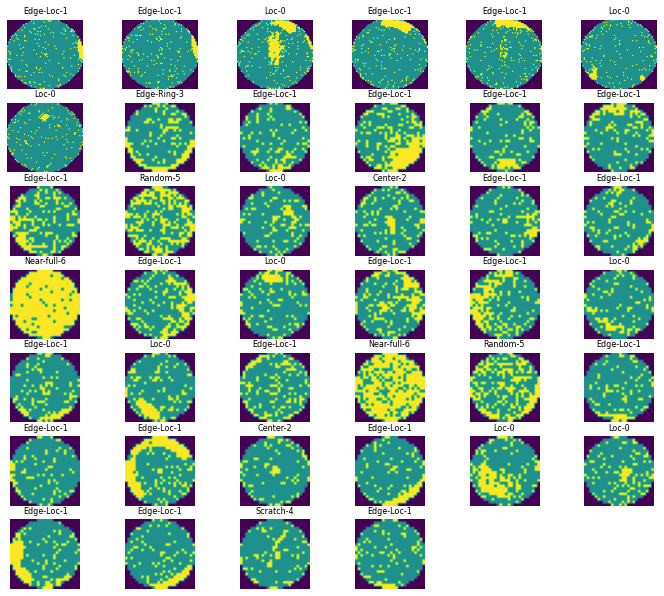

In [24]:
import matplotlib.pyplot as plt


config_idx2class_path = "./config_idx2class.json"
with open(config_idx2class_path, "r") as f:
        idx2class = json.load(f)
batch_size = 40
print(X_train["waferMap"].loc[:][0].shape)

plt.figure(figsize=(12,12))
for i in range(batch_size):
    ax = plt.subplot(8, 6, i+1)
    ax.axis("off")
    ax.imshow(X_train["waferMap"][i])
    ax.set_title(f'{idx2class[str(X_train["encoded_labels"][i])]}-{str(X_train["encoded_labels"][i])}', fontsize=8)

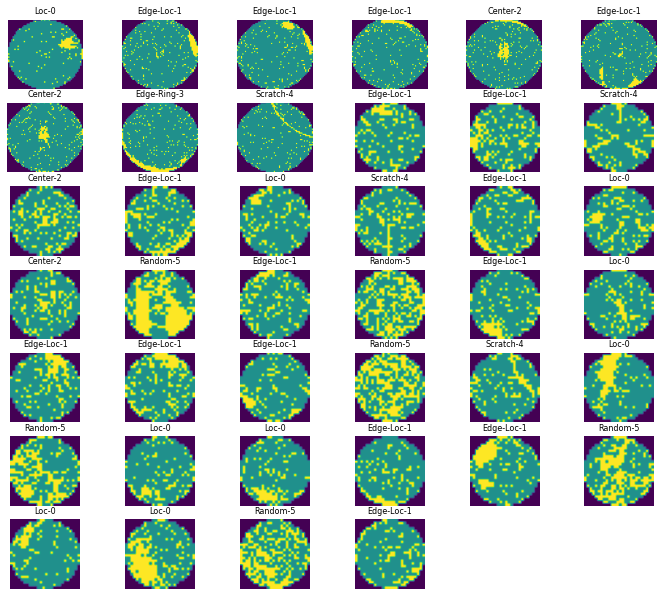

In [25]:
batch_size = 40

plt.figure(figsize=(12,12))
for i in range(batch_size):
    ax = plt.subplot(8, 6, i+1)
    ax.axis("off")
    ax.imshow(X_valid["waferMap"][i])
    ax.set_title(f'{idx2class[str(X_valid["encoded_labels"][i])]}-{str(X_valid["encoded_labels"][i])}', fontsize=8)